In [1]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [3]:
us_abbrev_to_state = {v: k for k, v in us_state_to_abbrev.items()}

In [4]:
states_list = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [5]:
data_frame = pd.read_csv("T40.2_States.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [6]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

In [7]:
CF19 = data_frame[(data_frame["Gender"] == "Female")& 
           (data_frame["Year"] == 2019.0) &
           (data_frame["Notes"] != "Total")]
CM19 = data_frame[(data_frame["Gender"] == "Male")& 
           (data_frame["Year"] == 2019.0) &
           (data_frame["Notes"] != "Total") ]
CF20 = data_frame[(data_frame["Gender"] == "Female")& 
           (data_frame["Year"] == 2020.0) &
           (data_frame["Notes"] != "Total")]
CM20 = data_frame[(data_frame["Gender"] == "Male")& 
           (data_frame["Year"] == 2020.0) &
           (data_frame["Notes"] != "Total")]

In [8]:
CF19b = CF19.sort_values(by=['Crude Rate'], ascending=True)
CF19b["Crude Rate"] = pd.to_numeric(CF19b["Crude Rate"], downcast="float")
CF19b = CF19b.sort_values(by=['Crude Rate'], ascending=True)

In [9]:
CF20b = CF20.sort_values(by=['Crude Rate'], ascending=True)
CF20b["Crude Rate"] = pd.to_numeric(CF20b["Crude Rate"], downcast="float")
CF20b = CF20b.sort_values(by=['Crude Rate'], ascending=True)

In [10]:
CM19b = CM19.sort_values(by=['Crude Rate'], ascending=True)
CM19b["Crude Rate"] = pd.to_numeric(CM19b["Crude Rate"], downcast="float")
CM19b = CM19b.sort_values(by=['Crude Rate'], ascending=True)

In [11]:
CM20b = CM20.sort_values(by=['Crude Rate'], ascending=True)
CM20b["Crude Rate"] = pd.to_numeric(CM20b["Crude Rate"], downcast="float")
CM20b = CM20b.sort_values(by=['Crude Rate'], ascending=True)

In [12]:
CF19bb = CF19b.dropna(subset=['Crude Rate'])
CF20bb = CF20b.dropna(subset=['Crude Rate'])

In [13]:
leftF = pd.DataFrame({"States": CF19["State"].astype(str), "2019": CF19["Crude Rate"].astype(float)})
rightF = pd.DataFrame({"States": CF20["State"].astype(str), "2020": CF20["Crude Rate"].astype(float)})

resultF = pd.merge(leftF, rightF, on = "States")
result2F = pd.merge(leftF, rightF, how = 'right')
resultF = resultF.dropna(thresh=2)

dfF = pd.DataFrame(resultF)
dfF.index = dfF['States']

leftM = pd.DataFrame({"States": CM19["State"].astype(str), "2019": CM19["Crude Rate"].astype(float)})
rightM = pd.DataFrame({"States": CM20["State"].astype(str), "2020": CM20["Crude Rate"].astype(float)})

resultM = pd.merge(leftM, rightM, on = "States")
result2M = pd.merge(leftM, rightM, how = 'right')
resultM = resultM.dropna(thresh=2)

dfM = pd.DataFrame(resultM)
dfM.index = dfM['States']


In [14]:
resultFb = resultF.sort_values(by=['2020'], ascending=True)
resultFb["2020"] = pd.to_numeric(resultFb["2020"], downcast="float")
resultFb = resultFb.sort_values(by=['2020'], ascending=True)

dfFb = pd.DataFrame(resultFb)
dfFb.index = dfFb['States']

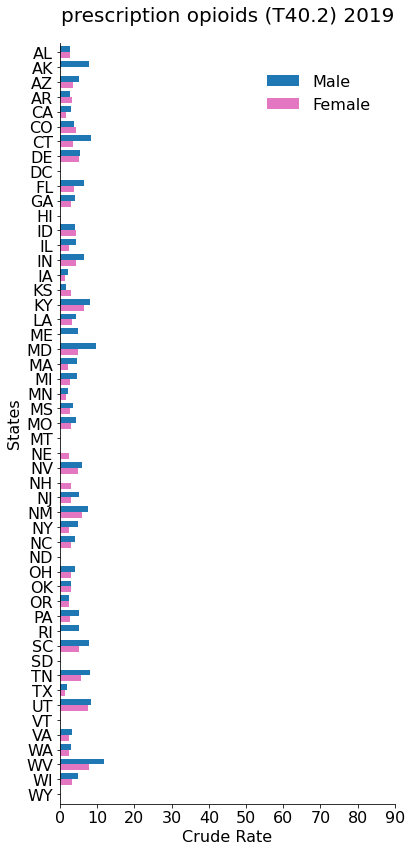

In [15]:
left19 = pd.DataFrame({"States": CF19["State"].astype(str), "Female": CF19["Crude Rate"].astype(float)})
right19 = pd.DataFrame({"States": CM19["State"].astype(str), "Male": CM19["Crude Rate"].astype(float)})

result19 = pd.merge(left19, right19, on = "States")
result219 = pd.merge(left19, right19, how = 'right')
#result19 = result19.dropna(thresh=2)

left20 = pd.DataFrame({"States": CF20["State"].astype(str), "Female": CF20["Crude Rate"].astype(float)})
right20 = pd.DataFrame({"States": CM20["State"].astype(str), "Male": CM20["Crude Rate"].astype(float)})

result20 = pd.merge(left20, right20, on = "States")
result220 = pd.merge(left20, right20, how = 'right')
#result20= result20.dropna(thresh=2)

resultF.loc[::-1]
#print(resultF.loc[::-1])

df19 = pd.DataFrame(result19.loc[::-1])
#df19.index = df19['States']
state_codes_19 = pd.Series(df19["States"]).map(us_state_to_abbrev).to_numpy()
df19.index = state_codes_19

ax = df19.plot(kind='barh', figsize=(6, 14),  color={"Female": "tab:pink", "Male": "tab:blue"}, width = 0.8, 
         fontsize=16)
plt.title('prescription opioids (T40.2) 2019', fontsize = 20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), framealpha=0.0, fontsize = 16, loc=(0.60,0.90))
plt.xlim((0,90))
plt.savefig('T40.2_2019.svg')

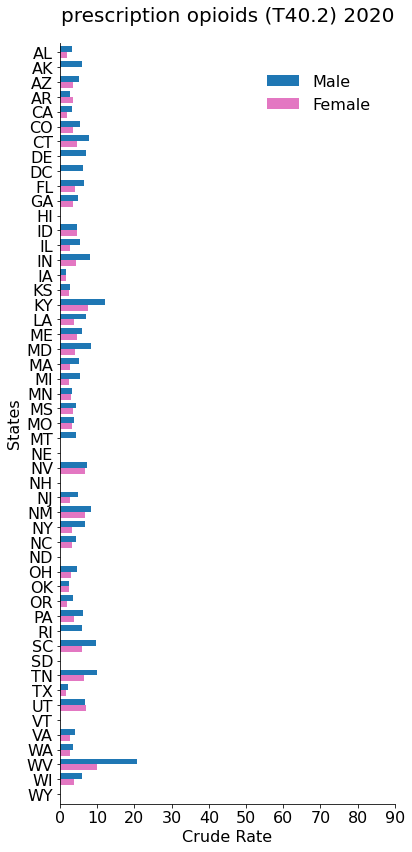

In [16]:
df20 = pd.DataFrame(result20.loc[::-1])
#df20.index = df20['States']
state_codes_20 = pd.Series(df20["States"]).map(us_state_to_abbrev).to_numpy()
df20.index = state_codes_20

ax2 = df20.plot(kind='barh', figsize=(6, 14), color={"Female": "tab:pink", "Male": "tab:blue"}, width = 0.8, 
                fontsize=16)
#plt.title('fentanyl (T40.4) 2020', fontsize = 20)
#plt.title('fentanyl (T40.4) 2020', size=20, y=1.02)
plt.title('prescription opioids (T40.2) 2020', size=20, y=1.02)
plt.xlabel('Crude Rate', fontsize = 16)
plt.ylabel('States', fontsize = 16)
#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels), framealpha=0.0, fontsize = 16, loc=(0.60,0.90)) 
plt.xlim((0,90))
plt.savefig('T40.2_2020.svg')